# Data Distributions


In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10, 10] # for square canvas

working_path = '/content/drive/My Drive/MMM_DataLoaderForStudentsC'
sys.path.append(f'{working_path}/src')
print(sys.path)
from data_utils_conda import *
clear_output(wait=False)

### Original Labels
pay attation that you might have points with no purpose, nor mode.

In [ ]:
labels = pd.read_csv(f'{working_path}/UID-MMM-labels.csv').drop(columns='Unnamed: 0')[['stop','mode','howTravelled','purpose','mainActivity']]
print(labels.count())
labels.head()

stop            5364
mode            5364
howTravelled    5364
purpose         5364
mainActivity    5364
dtype: int64


,stop,mode,howTravelled,purpose,mainActivity
0,1,0,-100,14,Work
1,2,5,Foot,0,-100
2,1,0,-100,0,-100
3,2,5,Foot,0,-100
4,1,0,-100,14,Work


In [ ]:
_, unique_mode_index = np.unique(labels['mode'], return_index = True)
_, unique_purpose_index = np.unique(labels['purpose'], return_index = True)
mode_label = pd.DataFrame(labels, index= unique_mode_index, columns= ['mode', 'howTravelled']).set_index('mode', inplace= False)
print(mode_label)

# the AIR mode has some issue, the default mode is a chaos
purpose_label = pd.DataFrame(labels, index= unique_purpose_index, columns= ['purpose', 'mainActivity']).set_index('purpose', inplace= False)
print(purpose_label)

     howTravelled
mode             
0            -100
1             Air
2         Bicycle
3             Bus
4         Default
5            Foot
6      Light Rail
7           Other
8         Vehicle
          mainActivity
purpose               
0                 -100
1            Accompany
2          Change Mode
3              Eat Out
4            Education
5        Entertainment
6              Errands
7             Exercise
8                 Home
9              Medical
10               Other
11         Second Home
12            Shopping
13           Socialize
14                Work
15        Work Related


stop 0: smartphone turned off

stop  mode  howTravelled  purpose  mainActivity 
0     0     -100          0        -100              211
1     0     -100          0        -100              656
                          1        Accompany         211
                          2        Change Mode       812
                          3        Eat Out            63
                          4        Education          76
                          5        Entertainment       2
                          6        Errands            16
                          7        Exercise           11
                          8        Home              495
                          9        Medical             4
                          10       Other               8
                          11       Second Home         6
                          12       Shopping           40
                          13       Socialize          25
                          14       Work              153
                          15       Work

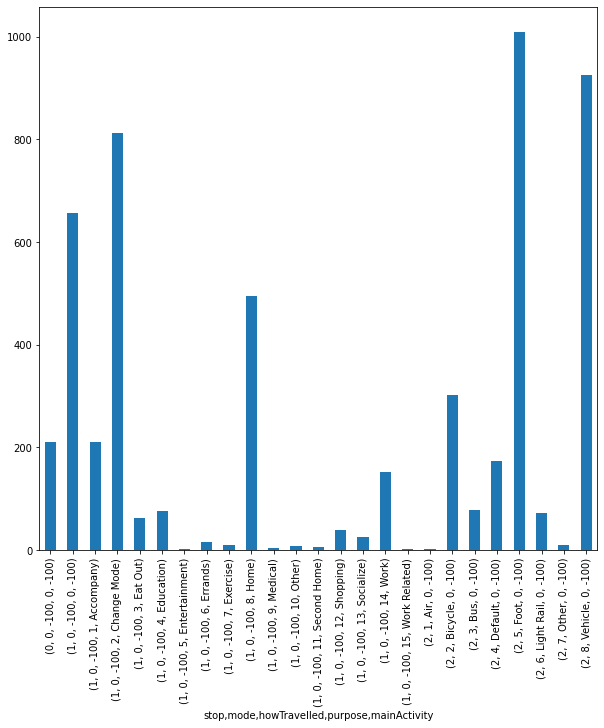

In [ ]:
print(labels.value_counts(sort = False))

labels.value_counts(sort = False).plot(kind='bar')

### Import Dataset

In [ ]:
seq_cutoff_speed = 45
seq_cutoff_time = 60
filter_seq = 5

In [ ]:
# dataset = pd.concat([create_data_frame(*load_user_data(user, data_directory=f'{working_path}/Pickle'), segmentation=True, seq_cutoff_time = seq_cutoff_time, seq_cutoff_speed = seq_cutoff_speed) for user in range(1,13)]).reset_index(drop=True)

# # add howtravelled and activity
# dataset['mode'] = dataset.apply(lambda row: mode_label.loc[row.labelM], axis=1)
# dataset['purpose'] = dataset.apply(lambda row: purpose_label.loc[row.labelP], axis=1)

# dataset.to_pickle(f'{working_path}/dataset.pkl')



In [ ]:
dataset = pd.read_pickle(f'{working_path}/dataset.pkl')
dataset.head(10)

,user,ts,image_ix,x,y,x_web,y_web,label2,labelP,labelM,delta_t,delta_d,bearing,speed,tod,segment_id,segment_ix,segment_point_count,mode,purpose
0,1,2018-06-25 09:57:31+00:00,1,1.394209e+06,7.516646e+06,1.394209e+06,7.516646e+06,1,3,0,671.0,7.751420,-1.856730,0.011552,1,1,0,1,-100,Eat Out
1,1,2018-06-25 09:58:43+00:00,4,1.394159e+06,7.516558e+06,1.394159e+06,7.516558e+06,2,0,4,72.0,133.415960,-2.005347,1.852999,1,2,0,1,Default,-100
2,1,2018-06-25 09:58:44+00:00,5,1.394177e+06,7.516504e+06,1.394177e+06,7.516504e+06,2,0,4,1.0,57.104376,-1.252389,57.104376,1,3,0,1,Default,-100
3,1,2018-06-25 09:58:45+00:00,6,1.394163e+06,7.516550e+06,1.394163e+06,7.516550e+06,2,0,4,1.0,47.314571,1.864483,47.314571,1,4,0,606,Default,-100
4,1,2018-06-25 09:58:46+00:00,7,1.394156e+06,7.516552e+06,1.394156e+06,7.516552e+06,2,0,4,1.0,7.512082,2.876788,7.512082,1,4,1,606,Default,-100
5,1,2018-06-25 09:58:47+00:00,8,1.394154e+06,7.516552e+06,1.394154e+06,7.516552e+06,2,0,4,1.0,2.106983,2.983060,2.106983,1,4,2,606,Default,-100
6,1,2018-06-25 09:58:48+00:00,9,1.394152e+06,7.516548e+06,1.394152e+06,7.516548e+06,2,0,4,1.0,3.969750,-2.004935,3.969750,1,4,3,606,Default,-100
7,1,2018-06-25 09:58:49+00:00,10,1.394151e+06,7.516547e+06,1.394151e+06,7.516547e+06,2,0,4,1.0,1.838343,-2.005848,1.838343,1,4,4,606,Default,-100
8,1,2018-06-25 09:58:50+00:00,11,1.394151e+06,7.516545e+06,1.394151e+06,7.516545e+06,2,0,4,1.0,1.299092,-2.088964,1.299092,1,4,5,606,Default,-100
9,1,2018-06-25 09:58:51+00:00,12,1.394149e+06,7.516544e+06,1.394149e+06,7.516544e+06,2,0,4,1.0,2.121588,-2.376706,2.121588,1,4,6,606,Default,-100


### **features**

In [ ]:
# dataset['bearing'].plot.kde()
# dataset['delta_t'].plot.kde()
# dataset['delta_d'].plot.kde()
# dataset['speed'].plot.kde()

# dataset[['speed', 'delta_t', 'delta_d', 'speed']].plot.kde()

### labels

In [ ]:
print(f'user:          {sorted(dataset.user.unique())}')
print(f'stop/motion:   {sorted(dataset.label2.unique())}')
print(f'mode:          {sorted(dataset.labelM.unique())}')
print(f'purpose:       {sorted(dataset.labelP.unique())}')

user:          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
stop/motion:   [1, 2]
mode:          [0, 1, 2, 3, 4, 5, 6, 7, 8]
purpose:       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15]


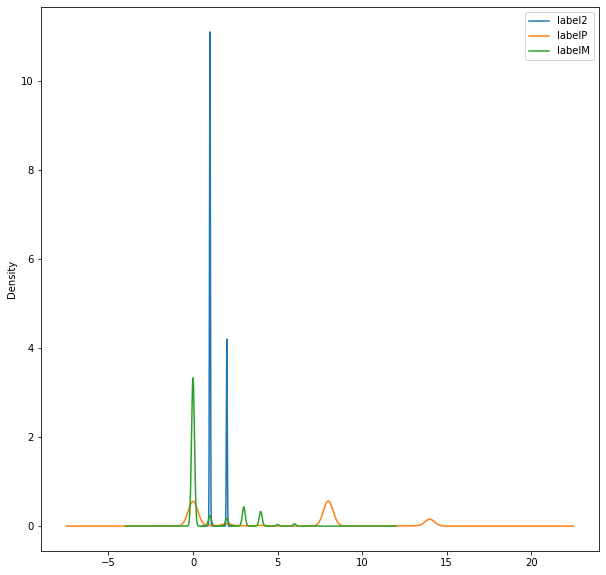

In [ ]:
dataset[['label2',	'labelP',	'labelM']].plot.kde()

label2  labelM  mode        labelP  purpose      
1       0       -100        0       -100             178523
                            1       Accompany         16331
                            2       Change Mode       57647
                            3       Eat Out           11376
                            4       Education         18782
                            5       Entertainment        98
                            6       Errands            3776
                            7       Exercise           1919
                            8       Home             594000
                            9       Medical            4260
                            11      Second Home         105
                            12      Shopping           5853
                            13      Socialize          8601
                            14      Work             163695
                            15      Work Related        139
2       1       Air         0       -100          

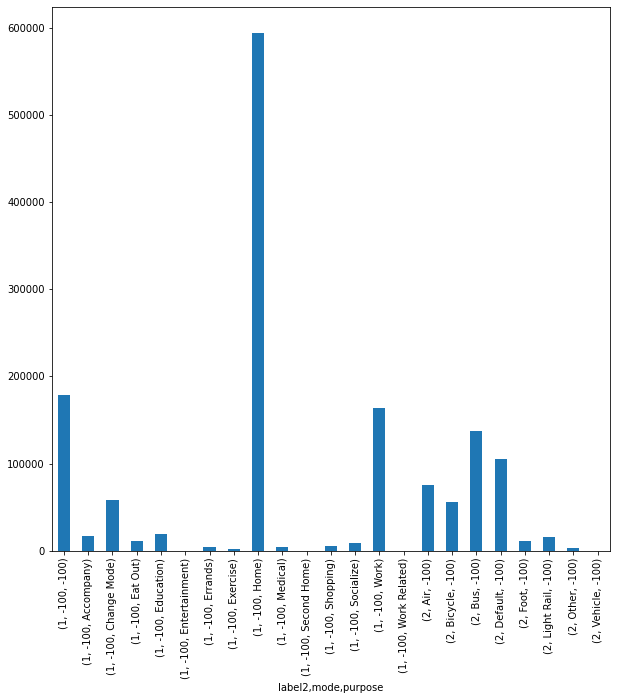

In [ ]:
print(dataset[['label2', 'labelM', 'mode', 'labelP','purpose']].value_counts(sort = False))

matplotlib.rcParams['figure.figsize'] = [10, 10] # for square canvas
dataset[['label2', 'mode','purpose']].value_counts(sort = False).plot(kind='bar')

In [ ]:
pd.DataFrame(dataset['label2'].value_counts(sort = False)).head()

,label2
1,1065105
2,403163


In [ ]:
pd.DataFrame(dataset['mode'].value_counts(sort = False)).head()

,mode
-100,1065105
Foot,10929
Vehicle,2
Bicycle,55543
Default,105497


In [ ]:
pd.DataFrame(dataset['purpose'].value_counts(sort = False)).head()

,purpose
Home,594000
-100,581686
Medical,4260
Shopping,5853
Work,163695


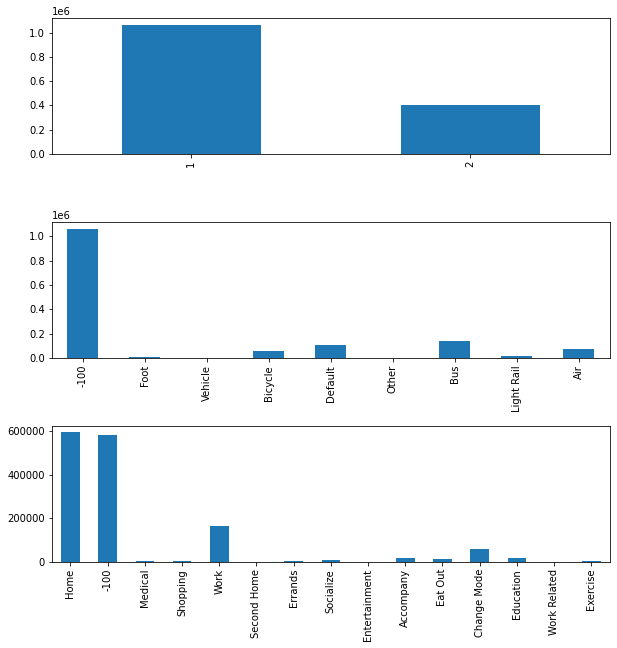

In [ ]:
fig, axes = plt.subplots(3)
matplotlib.rcParams['figure.figsize'] = [10, 10] # for square canvas
plt.subplots_adjust(wspace =0.2, hspace =0.5)#调整子图间距

dataset['label2'].value_counts(sort = False).plot(kind='bar', ax = axes[0])
dataset['mode'].value_counts(sort = False).plot(kind='bar', ax = axes[1])
dataset['purpose'].value_counts(sort = False).plot(kind='bar', ax = axes[2])


Home             594000
-100             581686
Medical            4260
Shopping           5853
Work             163695
Second Home         105
Errands            3776
Socialize          8601
Entertainment        98
Accompany         16331
Eat Out           11376
Change Mode       57647
Education         18782
Work Related        139
Exercise           1919
Name: purpose, dtype: int64


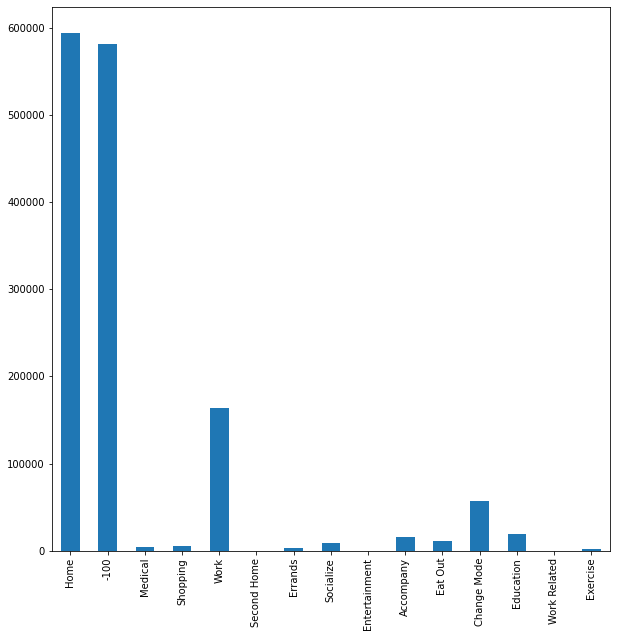

In [ ]:
print(dataset['purpose'].value_counts(sort = False))
dataset['purpose'].value_counts(sort = False).plot(kind='bar', )


-100          1065105
Foot            10929
Vehicle             2
Bicycle         55543
Default        105497
Other            2933
Bus            137756
Light Rail      15678
Air             74825
Name: mode, dtype: int64


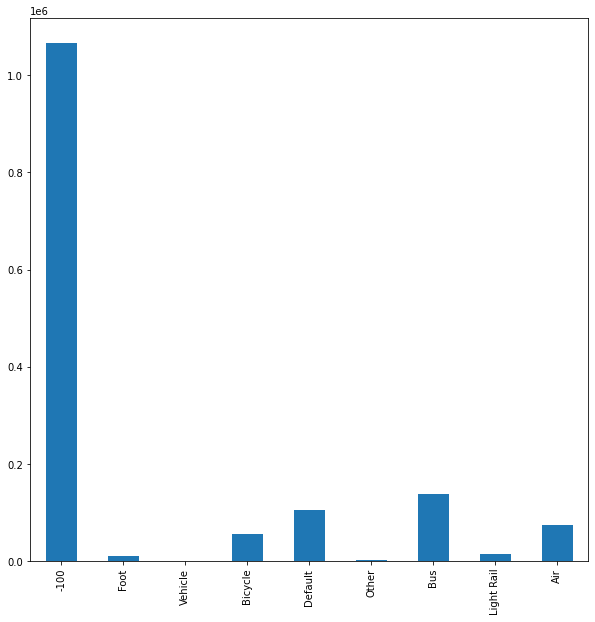

In [ ]:
print(dataset['mode'].value_counts(sort = False))
dataset['mode'].value_counts(sort = False).plot(kind='bar')

### labels by users

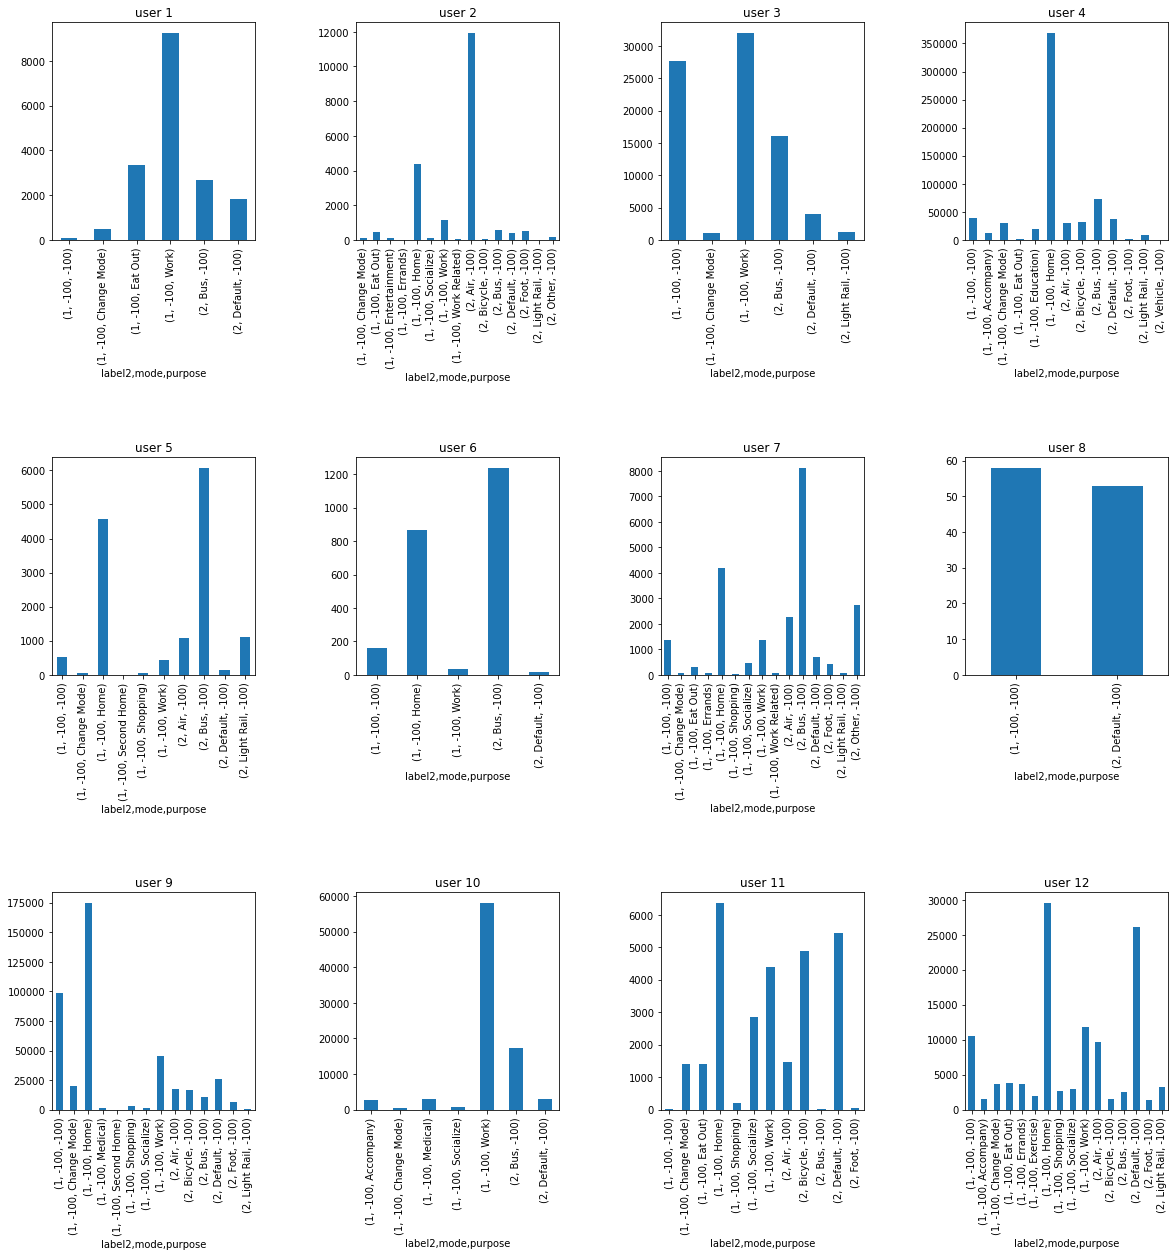

In [ ]:

matplotlib.rcParams['figure.figsize'] = [20, 20] # for square canvas
fig, axes = plt.subplots(3, 4)
plt.subplots_adjust(wspace =0.5, hspace =1)#调整子图间距
# plot counter
for r in range(3):
    for c in range(4):
        dataset[['label2','mode','purpose']][dataset['user'] == (c + 4*r + 1)].value_counts(sort = False).plot(kind='bar',ax=axes[r,c], title = f'user {r*4 + c +1}' )
